In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("../data iris.csv",delimiter=";")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
X = df.drop(columns="class")
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
class Kmeans():
    # initialisasikan
    def __init__(self, max_iter=100, n_cluster=2, min_diff=0.00001):
        self.inertia = 0
        self.n_cluster = n_cluster
        self.min_diff = min_diff
        self.max_iter = max_iter
        self.centroids = None

    # menghitung jarak uclidean
    @staticmethod
    def euclidean_distance(point1, point2):
        return np.sqrt(np.sum((point2 - point1)**2, axis=1))
    
    # melakukan training data
    def fit(self, x):
        # menentukan centroid secara acak (di awal-awal)
        self.centroids = np.random.uniform(np.amin(x, axis=0), np.amax(x, axis=0), size=(self.n_cluster, x.shape[1]))

        # melakukan iterasi
        for iteration in range(self.max_iter):
            # menghilangkan label ke awal
            y = []
            distance_w_cluster = [] # digunakan untuk menghitung distance yang paling kecil (untuk inertia)

            # menentukan labelnya / termasuk cluster apa (dengan menentukan jarak euclidian nya)
            for item in x:
                distances = Kmeans.euclidean_distance(item, self.centroids) # menghitung jarak setiap centroid
                distance_w_cluster.append(distances.min()) # menentukan jarak terkecil
                cluster = np.argmin(distances) # menentukan termasuk cluster apa dengan mencari jarak terkecilnya
                y.append(cluster)

            y = np.array(y)

            # untuk memisahkan antar cluster
            groups = []

            for i in range(self.n_cluster):
                groups.append(np.argwhere(y == i)) # mencari yang mana label sama dengan i 
            # print(groups)
            
            # menentukan centroid yang baru
            new_centroid = []
            inertia_group = []
            distance_w_cluster = np.array(distance_w_cluster)
            for i, indices in enumerate(groups):
                if len(indices) == 0: # jika ada centroid yang tak punya member
                    new_centroid.append(self.centroids[i]) # gunakan centroid yang sebelumnya
                else:
                    inertia_group.append(np.sum(distance_w_cluster[indices]))
                    new_centroid.append(np.mean(x[indices], axis=0)[0]) # mencari rata-rata dari centroid sebelumnya
            # print(np.sum(distance_w_cluster))
            # counting the error (inetia)
            self.inertia = np.mean(np.array(inertia_group)**2)

            print("iterasi ke", iteration, " :", self.centroids)
            # if the centroid not move the position from previous iteration
            if np.max(np.abs(self.centroids - np.array(new_centroid))) < self.min_diff:
                print(np.abs(np.array(new_centroid)))
                print(np.abs(np.array(self.centroids)))
                break
            else:
                self.centroids = np.array(new_centroid) # update centroid position
            


In [9]:
k_mean = Kmeans(n_cluster=3)
k_mean.fit(X.to_numpy())

iterasi ke 0  : [[7.34011195 4.29041672 4.21027992 2.49229799]
 [4.82262359 4.23639558 2.03484812 1.30875385]
 [5.38423533 2.44001316 4.85324065 0.2268868 ]]
iterasi ke 1  : [[6.89189189 3.13243243 5.61891892 2.04324324]
 [5.00784314 3.4        1.49411765 0.26078431]
 [5.90483871 2.72258065 4.51129032 1.46612903]]
iterasi ke 2  : [[6.87368421 3.08947368 5.71842105 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.88709677 2.73870968 4.40806452 1.43387097]]
iterasi ke 3  : [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.418      1.464      0.244     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.418      1.464      0.244     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.418      1.464      0.244     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


iterasi ke 0  : [[6.44670238 3.88634992 1.95768229 2.44161273]]
iterasi ke 1  : [[5.84333333 3.054      3.75866667 1.19866667]]
[[5.84333333 3.054      3.75866667 1.19866667]]
[[5.84333333 3.054      3.75866667 1.19866667]]
iterasi ke 0  : [[5.66777842 3.79118637 1.76050365 1.74238752]
 [7.21570039 4.33535605 1.70893625 2.44728786]]
iterasi ke 1  : [[5.66791045 3.04328358 3.4761194  1.0880597 ]
 [7.3125     3.14375    6.125      2.125     ]]
iterasi ke 2  : [[5.44571429 3.06190476 2.96095238 0.84666667]
 [6.77111111 3.03555556 5.62       2.02      ]]
iterasi ke 3  : [[5.20759494 3.13417722 2.38481013 0.60632911]
 [6.55070423 2.96478873 5.28732394 1.85774648]]
iterasi ke 4  : [[5.05666667 3.26       1.81166667 0.38666667]
 [6.36777778 2.91666667 5.05666667 1.74      ]]
iterasi ke 5  : [[5.00555556 3.33518519 1.59814815 0.30185185]
 [6.31458333 2.89583333 4.97395833 1.703125  ]]
iterasi ke 6  : [[5.00566038 3.36037736 1.56226415 0.28867925]
 [6.30103093 2.88659794 4.95876289 1.69587629]]

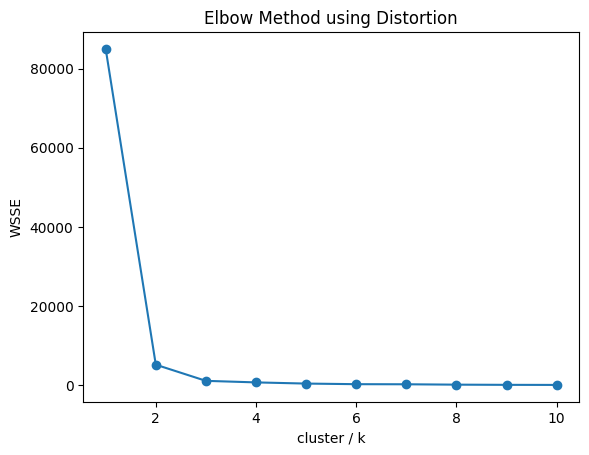

In [10]:
wcss = []
for i in range(1, 11):
    km = Kmeans(n_cluster=i)
    km.fit(X.to_numpy())
    wcss.append(km.inertia)

plt.plot(np.arange(1, 11), wcss, marker='o')
plt.title("Elbow Method using Distortion")
plt.xlabel("cluster / k")
plt.ylabel("WSSE")
print(wcss)

In [11]:
# menambahkan kolom label pada dataset
# X['Labels'] = k_mean
X['Labels'] = k_mean.labels_


# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['sepal_length'], y=X['sepal_width'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))

plt.title('KMeans dengan 2 cluster')
plt.show()

AttributeError: 'Kmeans' object has no attribute 'labels_'

In [35]:
if X.shape[1] != 2:
    raise ValueError("Visualisasi hanya didukung untuk data 2D.")
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

for i in range(k_mean.n_clusters):
    cluster_points = X[k_mean.labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                s=50, alpha=0.6, label=f"Cluster {i+1}", color=colors[i % len(colors)])
    plt.scatter(k_mean.centroids[i, 0], k_mean.centroids[i, 1],
                s=200, c=colors[i % len(colors)], edgecolors='black', marker='X', label=f"Centroid {i+1}")

plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()

ValueError: Visualisasi hanya didukung untuk data 2D.

In [47]:
# Normalisasi data
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
# Panggil algoritma KMeans
kmeans = Kmeans()
kmeans.fit(X_normalized)
# Pilih dua fitur untuk visualisasi (contoh: fitur pertama dan kedua)
x = X_normalized[:, :2]  # Fitur pertama (sepal_length) dan kedua (sepal_width)
centroids = kmeans.centroids[:, :2]  # Centroid untuk dua fitur tersebut
y = np.array(kmeans.labels_)  # Label cluster dari hasil KMeans

# Warna untuk setiap cluster
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Scatter plot data dengan warna berdasarkan cluster
for cluster in range(kmeans.n_cluster):
    cluster_points = x[y == cluster]  # Data poin yang termasuk dalam cluster ini
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[cluster], label=f"Cluster {cluster + 1}")

# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label="Centroid")

# Label dan pengaturan plot
plt.xlabel("Sepal Length (Normalized)")
plt.ylabel("Sepal Width (Normalized)")
plt.title("Clustering KMeans pada Data Iris")
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()

iterasi ke 0  : [[ 2.10479933 -1.90337918  1.49570728  1.09620743]
 [-1.12595466 -0.90788144 -1.54653375 -0.94801302]]
iterasi ke 1  : [[ 0.86663877 -0.22082454  0.87567768  0.87135276]
 [-0.75830892  0.19322148 -0.76621797 -0.76243367]]
iterasi ke 2  : [[ 0.66335927 -0.3164635   0.75622236  0.73769937]
 [-0.91606757  0.43702103 -1.04430706 -1.0187277 ]]
iterasi ke 3  : [[ 0.55458243 -0.38737333  0.68244316  0.65369626]
 [-1.01499048  0.70896629 -1.24899975 -1.19638749]]
iterasi ke 4  : [[ 0.50728948 -0.4211534   0.65243918  0.62756431]
 [-1.01457897  0.84230679 -1.30487835 -1.25512862]]
[[0.50728948 0.4211534  0.65243918 0.62756431]
 [1.01457897 0.84230679 1.30487835 1.25512862]]
[[0.50728948 0.4211534  0.65243918 0.62756431]
 [1.01457897 0.84230679 1.30487835 1.25512862]]


AttributeError: 'Kmeans' object has no attribute 'labels_'